In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [311]:
# Code starts here

train_data = pd.read_csv('train.csv')
X= train_data.drop(['insuranceclaim'] , axis = 1)
y = train_data['insuranceclaim']
# Code ends here.

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

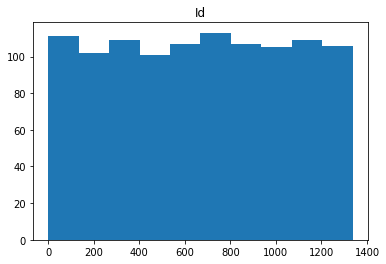

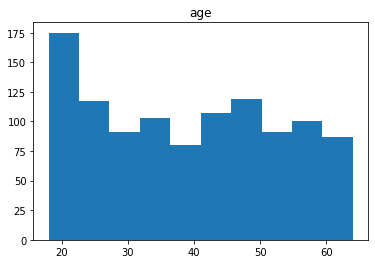

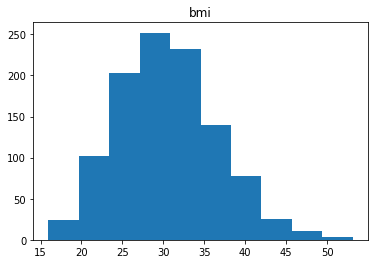

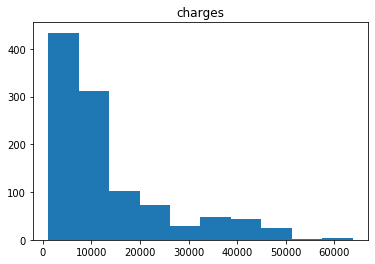

In [261]:
# For Numeric perform 1. Histograms to understand distribution, 2.Corr plot 3.Pivot table comparing your target variable across
# other numeric features.
# for Categorical perform 1.Bar charts to understand Balance . 2. Pivot table comparing relationship with target variable.
df_num = train_data[['Id', 'age', 'bmi','charges']]
df_cat = train_data[['sex', 'smoker', 'insuranceclaim', 'children', 'region']]
# 1. Distribution for numeric data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
# Only Bmi is fairly distributed , for rest we have to normalize and scale them

               Id       age       bmi   charges
Id       1.000000 -0.031798 -0.018060 -0.009031
age     -0.031798  1.000000  0.091499  0.316429
bmi     -0.018060  0.091499  1.000000  0.197609
charges -0.009031  0.316429  0.197609  1.000000


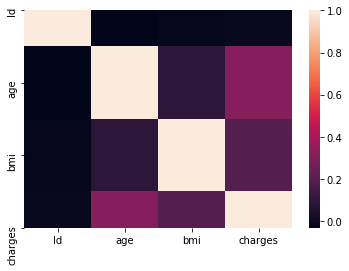

In [262]:
# 2. Corr plot

print(df_num.corr())
sns.heatmap(df_num.corr())
# Not much correlation between numeric features

In [263]:
# 3.Pivot table to get relationship between target feature vs others
pd.pivot_table(train_data, index = 'insuranceclaim', values = ['Id', 'age', 'bmi','charges'])

,Id,age,bmi,charges
insuranceclaim,,,,
0,683.500000,37.688312,27.922522,9001.025793
1,657.309211,40.050987,32.441291,16501.355190


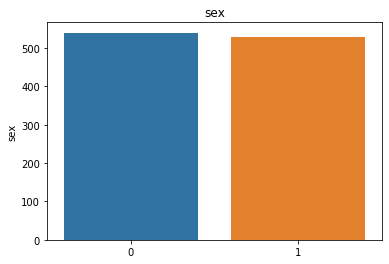

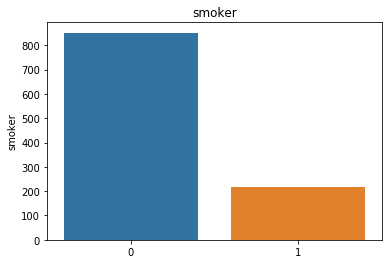

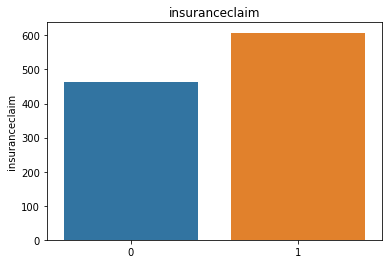

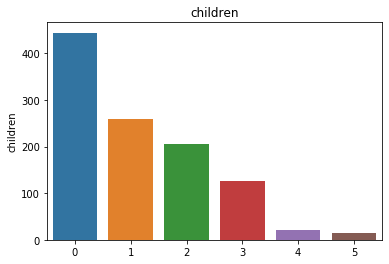

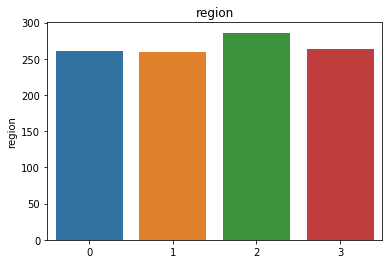

In [264]:
# for Categorical features
#1. Bar plots
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [141]:
# 2.Pivot table to get relationship between target feature vs others
print(pd.pivot_table(train_data, index = 'insuranceclaim', columns = 'sex', values = 'bmi' ,aggfunc= 'count'))
print()
print(pd.pivot_table(train_data, index = 'insuranceclaim', columns = 'children', values = 'bmi' ,aggfunc= 'count'))
print()
print(pd.pivot_table(train_data, index = 'insuranceclaim', columns = 'region', values = 'bmi' ,aggfunc= 'count'))
print()
print(pd.pivot_table(train_data, index = 'insuranceclaim', columns = 'smoker', values = 'bmi' ,aggfunc= 'count'))
print()

sex               0    1
insuranceclaim          
0               239  223
1               301  307

children          0    1    2   3   4   5
insuranceclaim                           
0                93  126  127  86  19  11
1               351  133   78  39   3   4

region            0    1    2    3
insuranceclaim                    
0               108  134  102  118
1               153  125  184  146

smoker            0    1
insuranceclaim          
0               441   21
1               411  197



In [142]:
#Data preprocessing
train_data.isnull().sum() # Check Null values and fill it using mean or median values
# Drop unwanted features like 'Id' in this case

Id                0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [312]:
# Code starts here
#Split train data into train and validation set
X_train,X_test , y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
# Feature Scaling to normalize features like age, Charges,Bmi 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [313]:
#Applying Grid Search to find Best model and parameters
logistic = LogisticRegression()
penalty = ['l1','l2']
C = np.logspace(-4, 4, 20)
solver =  ['liblinear', 'saga', 'warn']
max_iter = [100, 1000,2000,2500]
hyperparameters = dict(C=C, penalty=penalty,solver = solver, max_iter =max_iter)
clf = GridSearchCV(logistic, hyperparameters, cv=7, verbose=0, n_jobs = -1)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:',best_model.best_estimator_.get_params()['solver'])
print('Best max_iter:',best_model.best_estimator_.get_params()['max_iter'])


Best Penalty: l1
Best C: 0.23357214690901212
Best Solver: liblinear
Best max_iter: 100


In [314]:
clf_tuned = LogisticRegression(penalty = 'l1', C =0.23357214690901212,solver= 'liblinear', max_iter = 100)
best_tuned = clf_tuned.fit(X_train,y_train)
best_predict = best_tuned.predict(X_val)
roc_auc_score_tuned = roc_auc_score(y_val,best_predict)
print(roc_auc_score_tuned)




0.9074024704523238


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [315]:
# Code starts here

test_data = pd.read_csv('test.csv')
sc = StandardScaler()
X_test = sc.fit_transform(test_data)


In [317]:
test_prediction = best_tuned.predict(X_test)

submission = pd.DataFrame({'Id':test_data['Id'], 'insuranceclaim':test_prediction})
print(submission)
filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)
# Code ends here.

       Id  insuranceclaim
0     811               0
1     973               1
2     308               1
3     845               1
4    1050               1
..    ...             ...
263   461               1
264   626               0
265   614               1
266   636               0
267  1224               0

[268 rows x 2 columns]
Saved file: submission.csv
